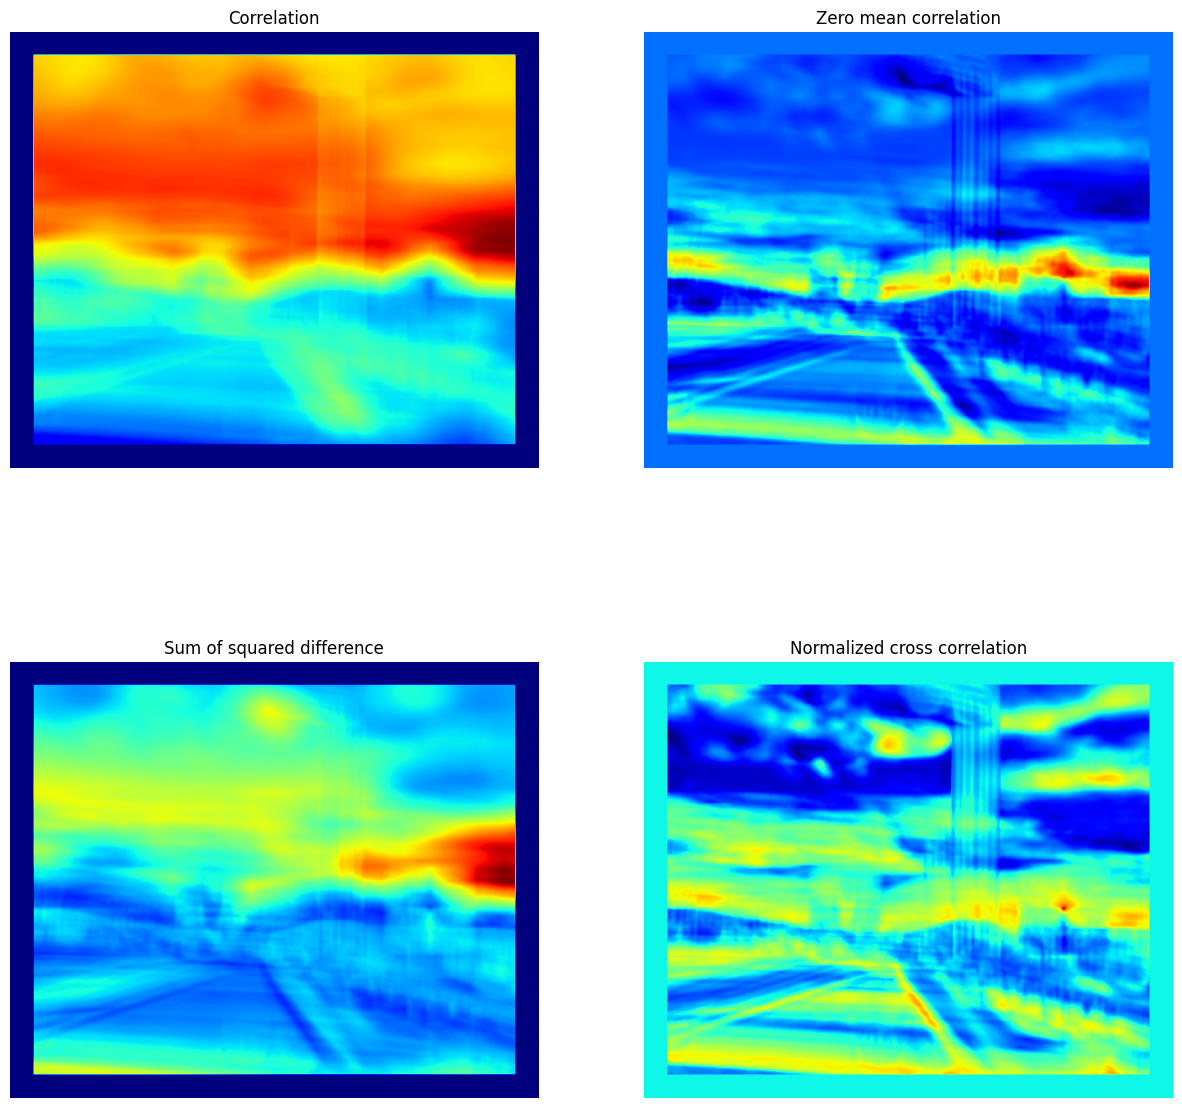

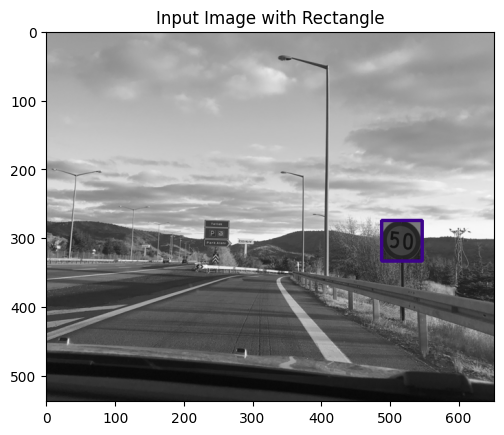

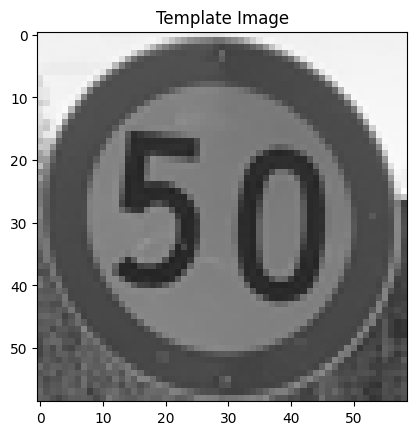

In [54]:
import numpy as np
import cv2

def correlationMeasure(P,T):
    P = np.float64(P)
    T = np.float64(T)
    
    val = np.sum(P * T)
    return val

def zeroMeanCorrelationMeasure(P,T):

    P = np.float64(P)
    T = np.float64(T)
    T_mean = np.mean(T)
        
    val = correlationMeasure((P - T_mean), T-T_mean)

    return val

def sumOfSquaredDifferenceMeasure(P,T):
    P = np.float64(P)
    T = np.float64(T)
    
    val = np.sum((P-T)**2)
    
    return val


def normalizedCrossCorrelationMeasure(P,T):
    P = np.float64(P)
    T = np.float64(T)
    
    P_mean = np.mean(P)
    T_mean = np.mean(T)
    val = np.sum((P - P_mean) * (T - T_mean)) / np.sqrt(np.sum((P - P_mean) ** 2) * np.sum((T - T_mean) ** 2))

    return val


input_image = cv2.imread('input2.png', cv2.IMREAD_GRAYSCALE)
template_image = cv2.imread('template.png', cv2.IMREAD_GRAYSCALE)


a = template_image.shape[0] // 2
b = template_image.shape[1] // 2


correlation_image = np.zeros_like(input_image, dtype=np.float64)
zero_mean_correlation_image = np.zeros_like(input_image, dtype=np.float64)
sum_of_squared_difference_image = np.zeros_like(input_image, dtype=np.float64)
normalized_cross_correlation_image = np.zeros_like(input_image, dtype=np.float64)


for i in range(a, input_image.shape[0]-a):
    for j in range(b, input_image.shape[1]-b):
       
        P = input_image[i-a:i+a+1, j-b:j+b+1]

       
        correlation_image[i,j] = correlationMeasure(P, template_image)
        zero_mean_correlation_image[i,j] = zeroMeanCorrelationMeasure(P, template_image)
        sum_of_squared_difference_image[i,j] = sumOfSquaredDifferenceMeasure(P, template_image)
        normalized_cross_correlation_image[i,j] = normalizedCrossCorrelationMeasure(P, template_image)


plt.figure(figsize=(15,15))
plt.subplot(221)
plt.imshow(correlation_image, cmap='jet')
plt.title('Correlation')
plt.axis('off')
plt.subplot(222)
plt.imshow(zero_mean_correlation_image, cmap='jet')
plt.title('Zero mean correlation')
plt.axis('off')
plt.subplot(223)
plt.imshow(sum_of_squared_difference_image, cmap='jet')
plt.title('Sum of squared difference')
plt.axis('off')
plt.subplot(224)
plt.imshow(normalized_cross_correlation_image, cmap='jet')
plt.title('Normalized cross correlation')
plt.axis('off')
plt.show()

#Part 1.A.2


correlation_result = cv2.matchTemplate(input_image, template_image, cv2.TM_CCORR)
min_val_corr, max_val_corr, min_loc_corr, max_loc_corr = cv2.minMaxLoc(correlation_result)

zero_mean_result = cv2.matchTemplate(input_image, template_image, cv2.TM_CCOEFF_NORMED)
min_val_zm, max_val_zm, min_loc_zm, max_loc_zm = cv2.minMaxLoc(zero_mean_result)

normalized_cross_correlation_result = cv2.matchTemplate(input_image, template_image, cv2.TM_CCOEFF)
min_val_ncc, max_val_ncc, min_loc_ncc, max_loc_ncc = cv2.minMaxLoc(normalized_cross_correlation_result)

squared_difference_result = cv2.matchTemplate(input_image, template_image, cv2.TM_SQDIFF)
min_val_ssd, max_val_ssd, min_loc_ssd, max_loc_ssd = cv2.minMaxLoc(squared_difference_result)

input_image_with_rectangles = cv2.cvtColor(input_image, cv2.COLOR_GRAY2BGR)
template_h, template_w = template_image.shape[:2]

cv2.rectangle(input_image_with_rectangles, min_loc_squared_difference, (min_loc_squared_difference[0] + template_w, min_loc_squared_difference[1] + template_h), (138, 3, 60) ,3)

input_image_rgb = cv2.cvtColor(input_image_with_rectangles, cv2.COLOR_BGR2RGB)
template_image_rgb = cv2.cvtColor(template_image, cv2.COLOR_BGR2RGB)

plt.imshow(input_image_rgb)
plt.title('Input Image with Rectangle')
plt.show()
plt.imshow(template_image_rgb)
plt.title('Template Image')
plt.show()